In [1]:
############################################
# k-nearest Neighbor-Algorithmus: Anatomie #
############################################

# Wir betrachten einen Datensatz mit Rot- und Weißweinen. Es soll an Hand des Chlorid- sowie Schwefeldioxidgehalts vorhergesagt werden, ob es sich um einen Rot- oder Weißwein handelt. Die Farbe des Rotweins stammt (entgegen landläufiger Meinungen) nicht von der Farbe der entsprechenden Beeren, sondern von der Art, wie die Beeren vergoren werden: Für Weißwein werden die Schalen der Traube nicht weiterverarbeitet, und es verbleibt der farblose Traubensagt. Für Rowein lässt man den Saft mit den Schalen vergären, die dem Wein dann die rote Farbe verleihen. Da die Schalen von Weinbeeren eine hohe Konzentration von Natriumchlorid (Speisesalz) enthalten, sind in Rotweinen dementsprechend mehr Chloride enthalten. Da Weißweine diesen Stoff weniger haben, wird ihnen erstazweise Schwefeldioxid als Konservierungsmittel hinzgefügt. Theoretisch sollten also in Rotweinen mehr Chloride und in Weißweinen mehr Schwefeldioxid enthalten sein.

# Da das Verständnis der Funktionsweise des kNN-Algorithmus sehr wichtig ist, wollen wir in dieser Übung zunächst auf den vorgefertigten Python-kNN-Algorithmus verzichten, und diesen stattdessen selbst programmieren (zugegebenermaßen lange nicht so effizient wie die vorgefertigte Prozedur, dies ist aber irrelevant, da es um das Verständnis geht).

In [1]:
# Bibliothek für Datenverarbeitung und -visualisierung
import pandas as pd

# Rotwein- und Weißweindaten einlesen
daten_rotweine = pd.read_csv('wine_red.csv', sep = ";")
daten_weissweine = pd.read_csv('wine_white.csv', sep = ";")

# Wie sieht der Datenssatz aus und wie viele Weine sind das jeweils?
daten_rotweine.head()
daten_weissweine.head()

daten_rotweine.shape
daten_weissweine.shape

(4898, 2)

In [3]:
# Daten kodieren (0 = Weißwein, 1 = Rotwein)
daten_rotweine['farbe'] = 1
daten_weissweine['farbe'] = 0

# Hat es geklappt? Daten anzeigen:
daten_rotweine.head()
daten_weissweine.head()

# Rot- und Weißweindaten in einem Datensatz vereinen, und dabei den Index ignorieren
# weine = daten_rotweine.append([daten_weissweine], ignore_index = True)
weine = pd.concat([daten_rotweine, daten_weissweine], ignore_index=True)

# Hat es geklappt? Daten anzeigen:
weine.head()
weine.tail()

weine.shape

(6497, 3)

Text(0, 0.5, 'Schwefeldioxid')

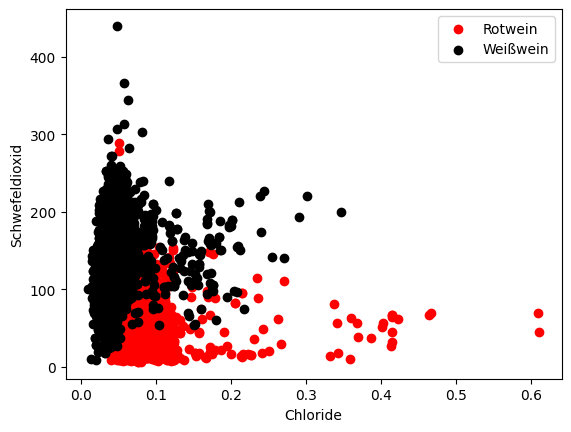

In [4]:
# Zur besseren Veranschaulichung betrachten wir die Daten in einem x-y-Scatterplot
import matplotlib.pyplot as plt

plt.scatter(daten_rotweine['chloride'], daten_rotweine['schwefeldioxid'], c = 'red', label = "Rotwein")
plt.scatter(daten_weissweine['chloride'], daten_weissweine['schwefeldioxid'], c = 'black', label = "Weißwein")
plt.legend()
plt.xlabel('Chloride')
plt.ylabel('Schwefeldioxid')

In [4]:
# Man kann nun klar unsere obige Vermutung erkennen, dass Rotweine eher Chloride und Weißweine eher Schwefeldioxid enthalten.

In [5]:
# Daten separieren in Input- und Outputvariablen (X und Y)

# Für X müssen wir Y aus den Daten werfen
X = weine.drop('farbe', axis=1)

# Y speichern wir einfach in einem separaten Datensatz
Y = weine.farbe

# Hat es geklappt? Daten anzeigen:
X.head()
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: farbe, dtype: int64

In [6]:
# KNN Algorithmus:

# 1. Funktion definieren, die den Euklidischen Abstand zwischen zwei Punkten berechnet
# 2. Diese Funktion benutzen, um den Euklidischen Abstand zwischen einem Testpunkt und allen bekannten Datenpunkten zu erhalten
# 3. Abstände sortieren, um die Punkte zu finden, die dem Testpunkt am nächsten sind
# 4. Benutze Y's dieser Punkte, um Y des Testpunktes vorherzusagen (wenn mehr Rot- als Weißweine, dann Rotwein, und umgekehrt)
# 5. Schritte 1. bis 4. solange wiederholen, bis alle Datenpunkte klassifiziert sind

In [7]:
# 1. Funktion definieren, die den Euklidischen Abstand zwischen zwei Punkten berechnet
 
# Die Inputparaemter sollen zwei Datenpunkte 1 und 2 sein (zur Erinnerung: jeder Datenpunkt ist ein Paar von Zahlen, nämlich Chlorid und Schwefel).
def euklidischer_abstand(datenpunkt1, datenpunkt2):

    # Idee: gehe alle Dimesionen (Attribute) durch und berechne jeweils die Euklidische Formel (zuerst die quadrierten Differenzen aufsummieren, am Schluss Wurzel ziehen)

    # Anzahl der Dimensionen (Attribute) definieren - hier sind es zwei: Chloride und Schwefeldioxid (man könnte auch len(datenpunkt2) machen)
    anzahl_attribute = len(datenpunkt1)

    # Variable definieren, in der der Abstand gespeichert wird, und erstmal auf Null setzen
    abstand = 0

    # for-Schleife, um den Abstand zu berechnen
    for i in range(anzahl_attribute):
        abstand = abstand+(datenpunkt1[i]-datenpunkt2[i])**2

    # jetzt die Wurzel aus dieser Summe quadrierter Differenzen ziehen
    abstand = abstand**0.5

    # Abstand zurückgeben
    return abstand

In [8]:
# Testen wir diese Funktion: Holen wir uns die ersten zwei Datenpunkte aus X und berechnen zunächst händisch den Abstand.
((X.iloc[0].chloride-X.iloc[1].chloride)**2+(X.iloc[0].schwefeldioxid-X.iloc[1].schwefeldioxid)**2)**(1/2)

# Kommt dies nun auch bei unserer Funktion raus?
euklidischer_abstand(X.iloc[0], X.iloc[1])

C:\Users\danilo.weber\AppData\Local\Temp\ipykernel_16544\1045062539.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abstand = abstand+(datenpunkt1[i]-datenpunkt2[i])**2


np.float64(33.00000733333252)

In [9]:
# 2. Diese Funktion benutzen, um den Euklidischen Abstand zwischen einem Testpunkt und allen bekannten Datenpunkten zu erhalten.

# Oben bei 1. haben wir nur den Abstand eines Testpunkts von nur einem weiteren Punkt berechnet. Es soll aber ja am Ende der Abstand des Testpunkts zu jedem anderen Punkt im Datensatz bestimmt werden, mit dem Ziel, daraus die k nächsten Nachbarn (also die mit den k geringsten Abständen zum Testpunkt) zu identifizieren.

# Definieren wir zunächst einen zufälligen Testpunkt, der natürlich kein Punkt des Datensatzes selbst sein darf (denn der Abstand eines Punktes zu sich selbst ist Null, und ein Punkt soll ja nicht nächster Nachbar von sich sein).
 
# Nehmen wir also z.B. als neuen Punkt den Mittelwert beider Spalten; für solche mathematische Operationen brauchen wir numpy
import numpy as np
testpunkt = [np.mean(X.chloride), np.mean(X.schwefeldioxid)] 
print(testpunkt)

# Verwenden wir einen Array, in dem wir die Abstände speichern
abstaende = []

# Gehen wir mit einer for-Schleife durch X und berechnen den Euklidischen Abstand eines jeden Punktes vom Testpunkt, und füllen dabei bei jedem Durchlauf den Abstände-Array mit diesen Abständen auf (mit append)
for i in X.index:
    abstaende.append(euklidischer_abstand(testpunkt, X.iloc[i]))

# zur Übung speichern wir den Array lieber als Dataframe ab, und zeigen die obersten Zeilen an
abstaende = pd.DataFrame(data = abstaende, index = X.index, columns = ['abstaende'])
abstaende.head()

[np.float64(0.05603386178236109), np.float64(115.7445744189626)]


C:\Users\danilo.weber\AppData\Local\Temp\ipykernel_16544\1045062539.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abstand = abstand+(datenpunkt1[i]-datenpunkt2[i])**2


,abstaende
0,81.744577
1,48.744592
2,61.744585
3,55.744578
4,81.744577


In [10]:
# 3. Abstände sortieren, um die Punkte zu finden, die dem Testpunkt am nächsten sind

# Um die k nächsten Nachbarn zu finden, könnten wir den Abstände-Dataframe einfach aufsteigend sortieren und uns die k obersten Abstände nehmen; definieren wir z.B. k=5
abstaende_5nn = abstaende.sort_values(by = ['abstaende'], axis = 0)[:5]
abstaende_5nn

,abstaende
5745,0.244704
1748,0.255434
1751,0.255434
2969,0.255457
5531,0.255497


In [11]:
# 4. Benutze Y's dieser Punkte, um Y des Testpunktes vorherzusagen (wenn mehr Rot- als Weißweine, dann Rotwein, und unmgekert).

# Wir benötigen nun die Y-Werte zu den 5 Punkten aus X, die als nächste Nachbarn zum Testpunkt identifiziert wurden. Speichern wir dazu in einer Variablen, wie oft welche Ausprägung von Y (0 = Weißwein, 1 = Rotwein) vorkommt. Anschließend zählen wir, welches Y (0 oder 1) häufiger vorkommt, da wir danach ja beurteilen, welches Y (bzw. Label) der Testpunkt bekommt.
from collections import Counter

counter = Counter(Y[abstaende_5nn.index])
counter
counter.most_common()[0][0]

# Es scheinen alle 5 nächsten Nachbarn des Testpunktes Weißweine zu sein, daher wird der Testpunkt ebenfalls das Label Weißwein kriegen

0

In [12]:
# 5. Schritte 1. bis 4. solange wiederholen, bis alle Datenpunkte klassifiziert sind

# Dafür müssen wir nun einfach den bisherigen Code zusammenfassen!

# Vorher ist aber noch die Frage, woher unsere Testpunkte kommen. Dazu teilen wir den Datensatz auf in Trainings- und Testdaten. Anschließend können wir die Datenpunkte (also je eine Kombination von Chlorid und Schwefelsäure) als Testpunkt benutzen, und jeweils deren Abstände zu den k nächsten Nachbarn im Trainingsdatensatz zu berechnen, um dann eine Klassifikation jedes Testpunkts zu erhalten (basierend darauf, ob die Nachbarn mehr Rot- oder mehr Weißweine sind). Anschließend können wir schauen, ob der Testpunkt vom Algorithmus richtig klassifiziert wurde (sprich: wenn das Modell Rotwein vorhersagt, ist es auch tatsächlich ein Rotwein?).

# Teilen wir also zunächst den Datensatz in Trainings- und Testdaten auf. 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)
# Schauen wir uns diese Funktion kurz näher an:

# - X sind die Eingangsdaten (Chloride, Schwefeldioxid) und Y sind die Ausgangsdaten (Rot- oder Weißwein), die wir ja zu Beginn aufgeteilt haben
# - test_size auf 0.2 gibt an, dass 20% der Daten als Testdaten verwendet werden, sodass 80% der Daten als Trainingsdaten übrig bleiben
# - random_state = 1 stellt sicher, dass die Daten jedes Mal gleich aufgeteilt werden, sodass die Ergebnisse replizierbar sind
# - stratify = Y bedeutet, dass im Trainingsdatensatz die selben Anteile an Rot- und Weißweinen enthalten ist wie im Gesamtdatensatz (wenn also z.B. 20% der Weine Rotweine sind, sind dann im Trainingsdatensatz auch 20% Rotweine)

# Nun müssen wir die Daten noch skalieren, da Chloride und Schwefeldioxid auf sehr unterschiedlichen Wertbereichen stattfinden:
X_training.head()
X_test.head()
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_test = scaler.transform(X_test)

In [14]:
# Nun fügen wir alle bisheringen Schritte zusammen in einer Funktion, die uns die Zugehörigkeit der Daten im Testdatensatz vorhersagt (also ob es sich um einen Rot- oder einen Weißwein handelt).

def knn_vorhersagen(X_training, X_test, Y_training, Y_test, k):

    # Zunächst nochmal vorsichtshalber den Counter importieren, der nachher die Häufigkeit der beiden Y-Ausprägungen Rot- oder Weißwein zählt (aus Schritt 4)
    from collections import Counter

    # für die Vorhersage Rot- oder Weißwein brauchen wir einen Array mit den Vorhersagen
    vorhersagen = []

    # Nun nehmen wir jeden Punkt aus dem Testdatensatz als Testpunkt, berechnen zu jedem Punkt (äußere for-Schleife) den Euklidischen Abstand zu allen Punkten im Trainingsdatensatz (innere for-Schleife), sortieren die Abstände aufsteigend, um die k kleinsten Abstände zu bekommen, betrachten, ob diese k Punkte im Trainingsdatensatz häufiger Rot- oder häufiger Weißweine sind, und geben dem Testpunkt dann das Label der häufigeren Weinsorte. Dies ist dann auch gleichzeitig die Vorhersage der Weinsorte, die die Funktion zurückgeben soll.

    for testpunkt in X_test:

        # siehe Schritt 2:
        abstaende = []
      
        for trainingspunkt in X_training:
            abstaende.append(euklidischer_abstand(testpunkt, trainingspunkt))

        abstaende = pd.DataFrame(data = abstaende, index = Y_training.index, columns = ['abstaende'])

        # siehe Schritt 3:
        abstaende_knn = abstaende.sort_values(by = ['abstaende'], axis = 0)[:k]

        # siehe Schritt 4:
        counter = Counter(Y_training[abstaende_knn.index])
        vorhersage = counter.most_common()[0][0]

        # Vorhersagen aneinander ketten
        vorhersagen.append(vorhersage)

    return vorhersagen

In [15]:
# Nun testen wir unseren knn-Algorithmus! Zum Beispiel mit k=5:
vorhersagen = knn_vorhersagen(X_training, X_test, Y_training, Y_test, k=5)

In [16]:
print(vorhersagen[0:5])
# Dies sind die Vorhersagen für den Testdatensatz, basierend auf dem Trainingsdatensatz!

[0, 1, 0, 1, 1]


In [17]:
# Betrachten wir nun, wie genau der Algorithmus gearbeitet hat!
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, vorhersagen))

0.9761538461538461


In [18]:
# Haben wir den Algorithmus richtig programmiert? Dazu schauen wir einfach, was die vorgefertige knn-Funktion aus scikit-learn liefert!
from sklearn.neighbors import KNeighborsClassifier

klassifikator = KNeighborsClassifier(n_neighbors = 5)
klassifikator.fit(X_training, Y_training)
vorhersage_scikit = klassifikator.predict(X_test)

print(accuracy_score(Y_test, vorhersage_scikit))
# Sieht gut aus!

0.9761538461538461


In [19]:
# Eine weitere Möglichkeit, die Genauigkeit zu berechnen ist mit einer sog. Konfusionsmatrix
from sklearn.metrics import confusion_matrix

konfusionsmatrix = confusion_matrix(Y_test, vorhersagen)
print(konfusionsmatrix)
# Die Einträge bedeuten folgendes:
# - links oben: Anzahl von Weißwein-Vorhersagen, die auch tatsächlich Weißweine sind (TP = True Positive)
# - rechts unten: Anzahl von Rotwein-Vorhersagen, die auch tatsächlich Rotweine sind (TN = True Negative)
# - links unten: Anzahl von Rotwein-Vorhersagen, die aber Weißweine sind (FP = False Positive)
# - rechts oben: Anzahl von Weißwein-Vorhersagen, die aber Rotweine sind (FN = False Negative)

# Wenn wir also wissen wollen, wie viel Prozent der Weine im Testdatensatz durch den Algorithmus richtig klassifiziert wurden, müssen wir die Anzahl richtiger Vorhersagen (also TP und TN) durch alle Vorhersagen (TP, TN, FP und FN) teilen:
(konfusionsmatrix[0,0]+konfusionsmatrix[1,1])/np.sum(konfusionsmatrix)
# Wir erhalten wieder den selben Genauigkeits-Score!


[[965  15]
 [ 16 304]]


np.float64(0.9761538461538461)

C:\Users\danilo.weber\AppData\Local\Temp\ipykernel_16544\991243450.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


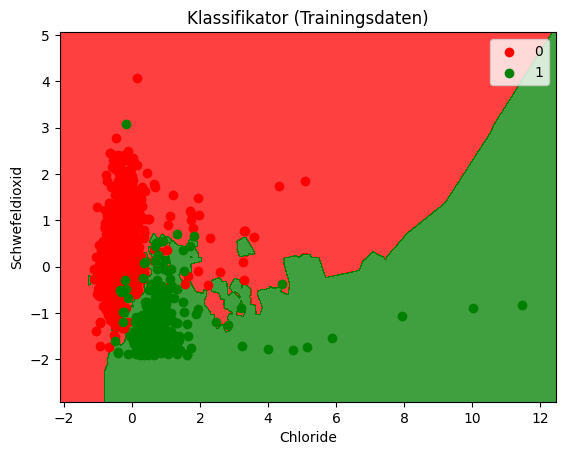

In [20]:
# Zuletzt können wir als Fleißaufgabe noch die Klassifikationsgrenzen betrachten, d.h. wo zieht der Algorithmus die Grenzen zwischen Rot- und Weißweinen. Wie in der Theorie besprochen, sollte die Grenze für höhere k immer "weicher" werden, da immer weniger Ausreißer berücksichtigt werden. Die Erklärung des folgendes Codes ist nicht zwingend notwenidg. Probiert aber in Zeile 4 mal ein sehr kleines k (z.B. 3) und ein sehr großes k (z.B. 50) - dort ist sehr gut sichtbar, dass die Grenzen weicher werden!

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

klassifikator = KNeighborsClassifier(n_neighbors = 3)
klassifikator.fit(X_training, Y_training)

X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, klassifikator.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klassifikator (Trainingsdaten)')
plt.xlabel('Chloride')
plt.ylabel('Schwefeldioxid')
plt.legend()
plt.show()